In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.filters import gaussian_filter
import sys

In [3]:
dir_name = '../../rslaser/package_data/'
img_name = 'raw_beam_profile_532nm_pump.bmp'

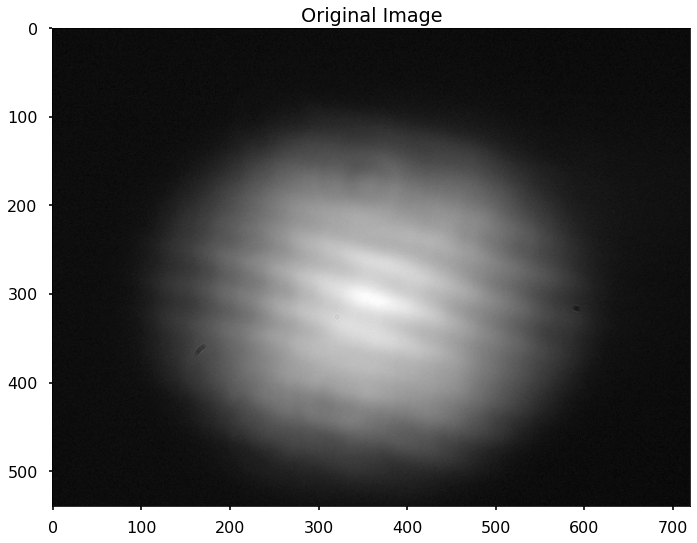

In [4]:
img = Image.open(dir_name + img_name)
img_orig = np.array(img)
    
with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
#    ax.imshow(img_orig, cmap='gray', vmin=0, vmax=255)
    ax.imshow(img_orig, cmap='gray', vmin=np.min(img_orig), vmax=np.max(img_orig))
    ax.set_title("Original Image")

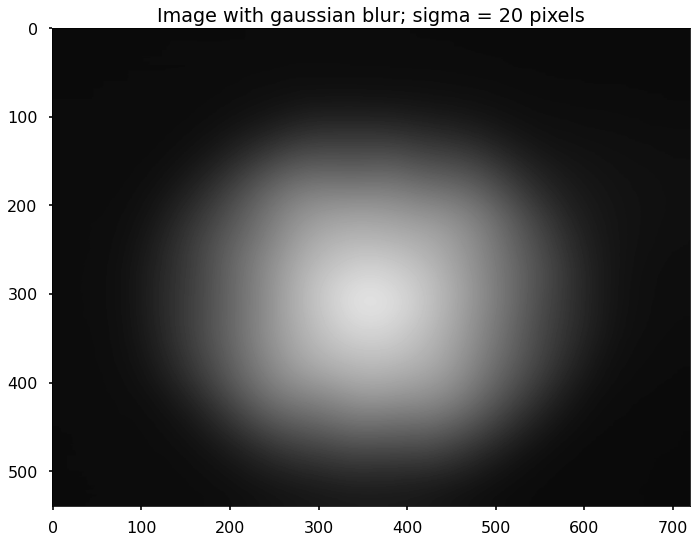

In [5]:
blur = 20
img_smooth = gaussian_filter(img_orig, sigma=blur)

with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
#    ax.imshow(img_smooth, cmap='gray', vmin=0, vmax=255)
    ax.imshow(img_smooth, cmap='gray', vmin=np.min(img_orig), vmax=np.max(img_orig))
    ax.set_title("Image with gaussian blur; sigma = " + str(blur) + " pixels")

 max relative deviation (above) =  12.0 %
 max relative deviation (below) =  10.857142857142858 %


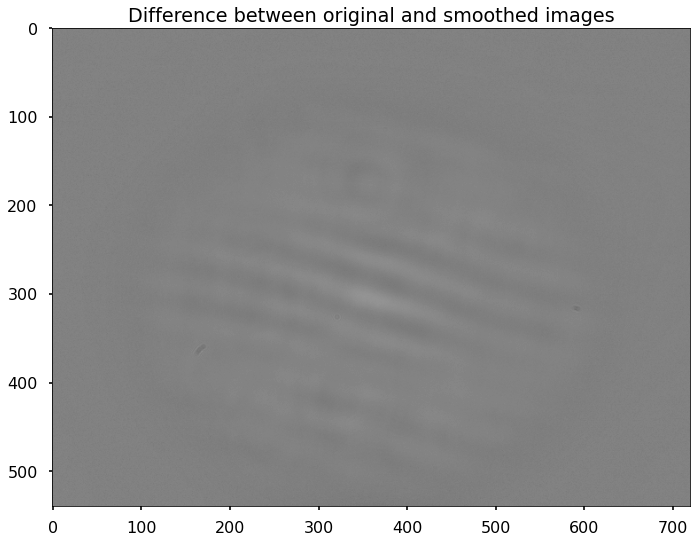

In [6]:
img_diff = 128 + img_orig - img_smooth
    
with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
    ax.imshow(img_diff, cmap='gray', vmin=0, vmax=255)
    ax.set_title("Difference between original and smoothed images")

print(' max relative deviation (above) = ', 100.*((np.max(img_diff)-128)/np.max(img_orig)), '%')
print(' max relative deviation (below) = ', 100.*((128-np.min(img_diff))/np.max(img_orig)), '%')

In [7]:

print(' ')
print('*************************')
print('img_orig = ')
print(img_orig)
min_orig = np.min(img_orig)
max_orig = np.max(img_orig)
print(' ')
print('min original = ', min_orig)
print('max original = ', max_orig)

print(' ')
print('*************************')
print('img_smooth = ')
print(img_smooth)
min_smooth = np.min(img_smooth)
max_smooth = np.max(img_smooth)
print(' ')
print('min smoothed = ', min_smooth)
print('max smoothed = ', max_smooth)

print(' ')
print('*************************')
print('img_diff = ')
print(img_diff)
min_diff = np.min(img_diff)
max_diff = np.max(img_diff)
print(' ')
print('min diff = ', min_diff)
print('max diff = ', max_diff)

 
*************************
img_orig = 
[[15 17 12 ... 12 12 15]
 [12 15 15 ... 15 15 15]
 [15 12 15 ... 17 12 12]
 ...
 [12 15  9 ... 12 15 15]
 [15 15 15 ... 15 15 12]
 [15 15 15 ...  9 12 12]]
 
min original =  6
max original =  175
 
*************************
img_smooth = 
[[13 13 13 ... 13 13 13]
 [13 13 13 ... 13 13 13]
 [13 13 13 ... 13 13 13]
 ...
 [13 13 13 ... 12 12 12]
 [13 13 13 ... 12 12 12]
 [13 13 13 ... 12 12 12]]
 
min smoothed =  12
max smoothed =  154
 
*************************
img_diff = 
[[130 132 127 ... 127 127 130]
 [127 130 130 ... 130 130 130]
 [130 127 130 ... 132 127 127]
 ...
 [127 130 124 ... 128 131 131]
 [130 130 130 ... 131 131 128]
 [130 130 130 ... 125 128 128]]
 
min diff =  109
max diff =  149
